 # 5. Regularization Techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
X, y = make_moons(100, noise=0.25, random_state=2)
# toy dataset with 2 features: 100 samples

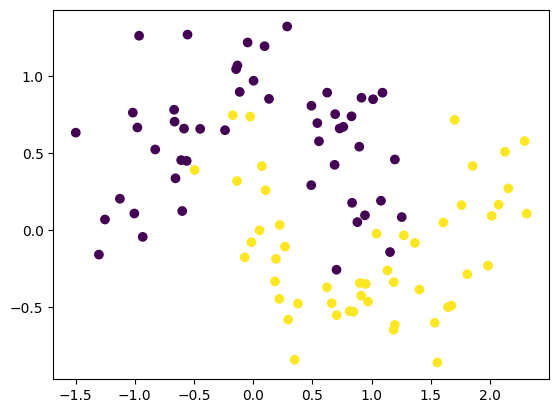

In [14]:
plt.scatter(X[:,0], X[:,1], c=y) # generates different colors with binary values
plt.show()

In [15]:
# Generate simple ANN network
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1,  activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, 
metrics=['accuracy'])

In [17]:
history1 = model1.fit(X, y, epochs=2000, validation_split =
0.2,verbose=0)

9600/9600 [==============================] - 5s 493us/step


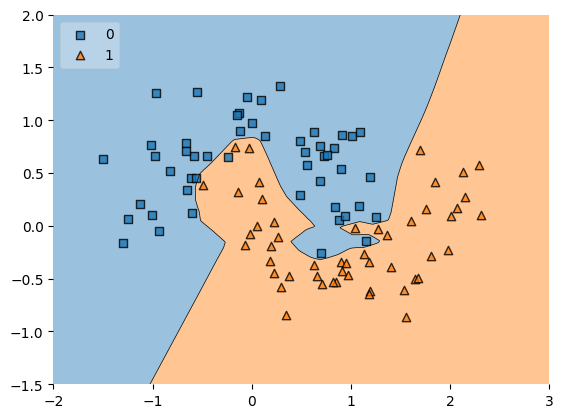

In [19]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2) # X is for input data, y=integer labels, clf=model1 trained classifier, legend=2 location of legend point
plt.xlim(-2,3) # sets the limits of the x-axis 
plt.ylim(-1.5,2) # sets the limits of the y-axis
plt.show()

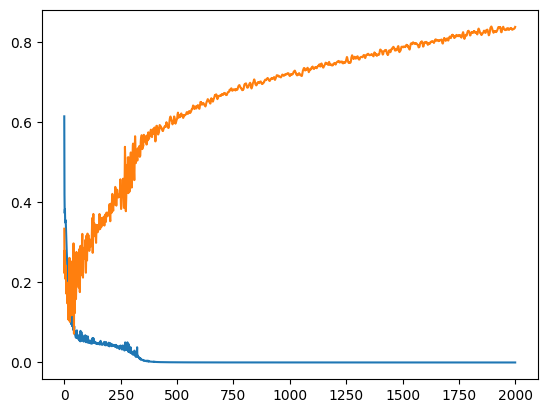

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [26]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 5s 470us/step


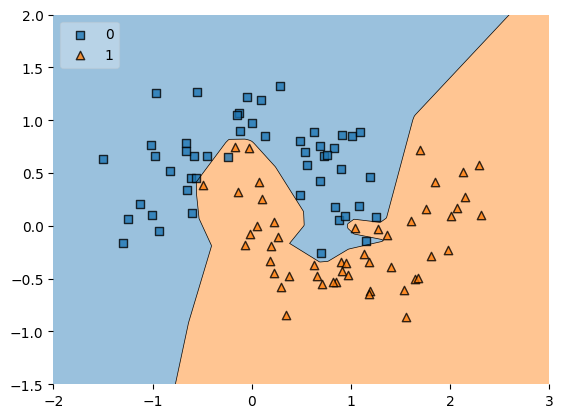

In [33]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

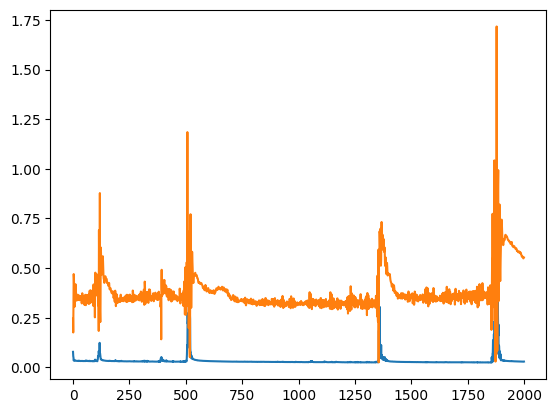

In [34]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [35]:
# Calculation of accuracy of each model
# Calculate the accuracy of model 1
acc_model1 = history1.history['accuracy'][-1]*100

# Calculate the accuracy for model 2
acc_model2 = history2.history['accuracy'][-1]*100

print(f"Accuracy for model 1: {acc_model1:.2f}%")
print(f"Accuracy for model 2: {acc_model2:.2f}%")

Accuracy for model 1: 100.00%
Accuracy for model 2: 100.00%
